#### Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations

## 1. Loading the data

In [2]:
spotify_data = pd.read_csv("spotify-2023.csv", encoding ='ISO-8859-1')
spotify_data.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


In [3]:
spotify_data.shape

(953, 24)

In [4]:
data_summary = spotify_data.describe(include='all')
data_summary

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
count,953,953,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953,953.000000,...,953.000000,858,953,953.00000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000
unique,943,645,NaN,NaN,NaN,NaN,NaN,NaN,949,NaN,...,NaN,11,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Daylight,Taylor Swift,NaN,NaN,NaN,NaN,NaN,NaN,723894473,NaN,...,NaN,C#,Major,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,2,34,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,...,NaN,120,550,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,1.556139,2018.238195,6.033578,13.930745,5200.124869,12.009444,NaN,67.812172,...,122.540399,NaN,NaN,66.96957,51.431270,64.279119,27.057712,1.581322,18.213012,10.131165
std,NaN,NaN,0.893044,11.116218,3.566435,9.201949,7897.608990,19.575992,NaN,86.441493,...,28.057802,NaN,NaN,14.63061,23.480632,16.550526,25.996077,8.409800,13.711223,9.912888
min,NaN,NaN,1.000000,1930.000000,1.000000,1.000000,31.000000,0.000000,NaN,0.000000,...,65.000000,NaN,NaN,23.00000,4.000000,9.000000,0.000000,0.000000,3.000000,2.000000
25%,NaN,NaN,1.000000,2020.000000,3.000000,6.000000,875.000000,0.000000,NaN,13.000000,...,100.000000,NaN,NaN,57.00000,32.000000,53.000000,6.000000,0.000000,10.000000,4.000000
50%,NaN,NaN,1.000000,2022.000000,6.000000,13.000000,2224.000000,3.000000,NaN,34.000000,...,121.000000,NaN,NaN,69.00000,51.000000,66.000000,18.000000,0.000000,12.000000,6.000000
75%,NaN,NaN,2.000000,2022.000000,9.000000,22.000000,5542.000000,16.000000,NaN,88.000000,...,140.000000,NaN,NaN,78.00000,70.000000,77.000000,43.000000,0.000000,24.000000,11.000000


In [5]:
missing_values = spotify_data.isnull().sum()
missing_values

track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64

In [6]:
spotify_data.dtypes

track_name              object
artist(s)_name          object
artist_count             int64
released_year            int64
released_month           int64
released_day             int64
in_spotify_playlists     int64
in_spotify_charts        int64
streams                 object
in_apple_playlists       int64
in_apple_charts          int64
in_deezer_playlists     object
in_deezer_charts         int64
in_shazam_charts        object
bpm                      int64
key                     object
mode                    object
danceability_%           int64
valence_%                int64
energy_%                 int64
acousticness_%           int64
instrumentalness_%       int64
liveness_%               int64
speechiness_%            int64
dtype: object

## 2. Distribution of precentage features

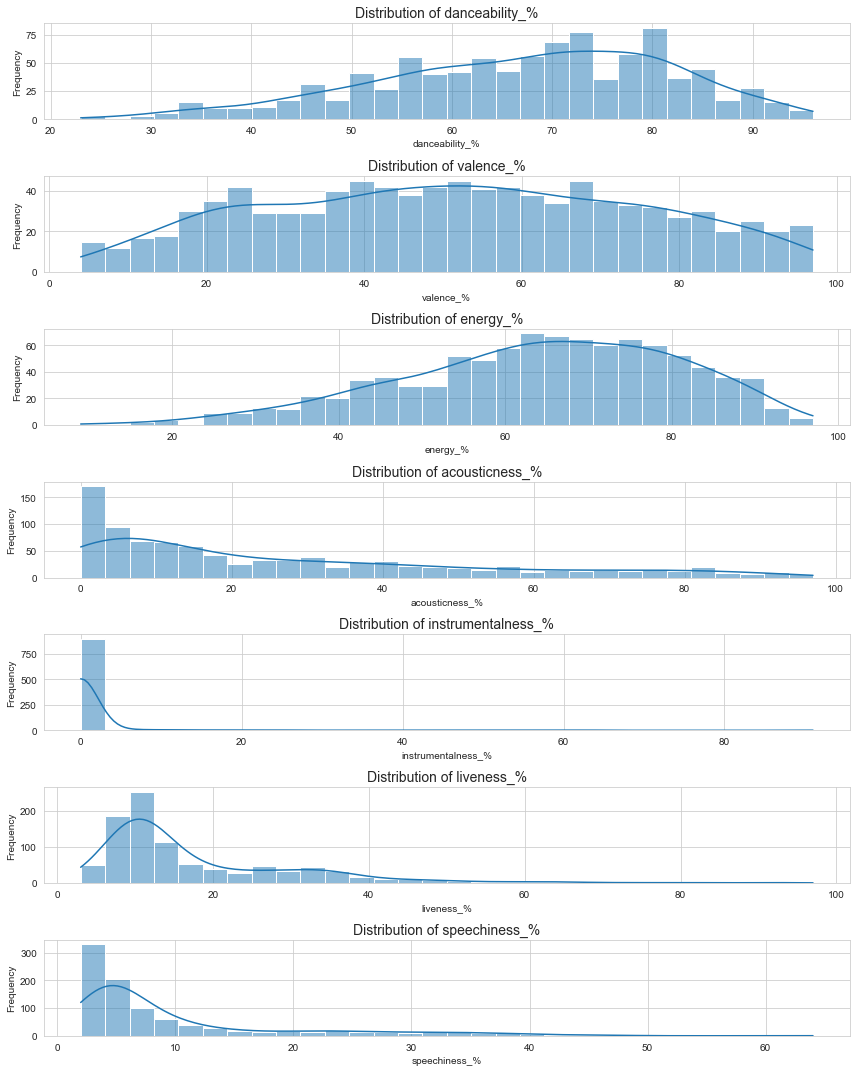

In [10]:
sns.set_style('whitegrid')
features_to_visualize = spotify_data.columns[-7:]

fig, axes = plt.subplots(nrows = len(features_to_visualize), figsize =(12,15))

for i, feature in enumerate(features_to_visualize):
    sns.histplot(spotify_data[feature], ax=axes[i], bins = 30, kde = True)
    axes[i].set_title(f'Distribution of {feature}', fontsize =14)
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')
    
plt.tight_layout()
plt.show()

## 3. Top 10 songs based on their presence in spotify playlist

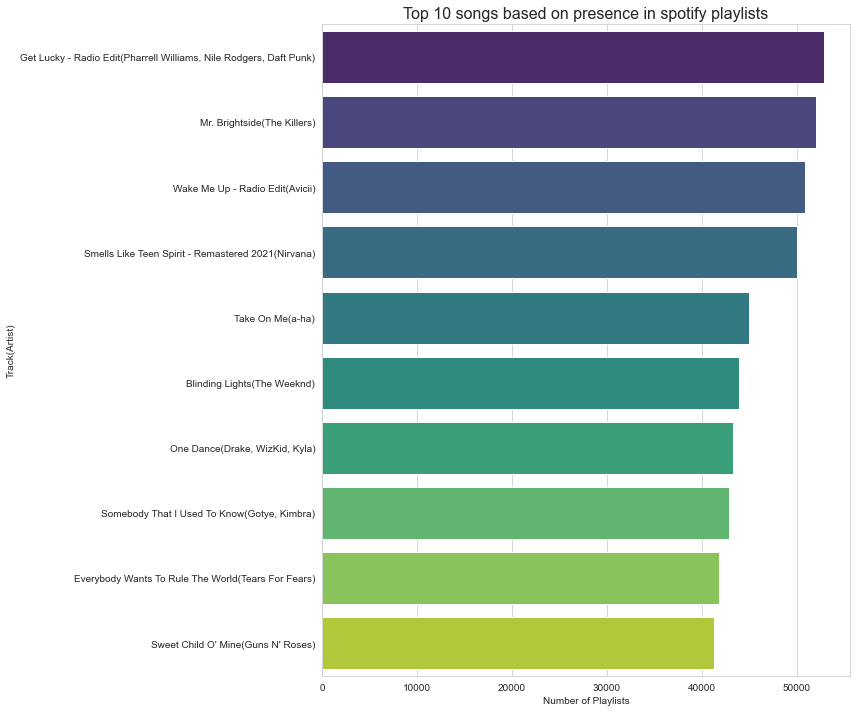

In [12]:
top_songs_in_playlist = spotify_data.sort_values(by ="in_spotify_playlists", ascending = False).head(10)

#combining track name and artist name
top_songs_in_playlist['track_artist'] = top_songs_in_playlist['track_name']+"("+ top_songs_in_playlist['artist(s)_name'] +")"

#plotiing the song with artist name

plt.figure(figsize = (12,10))
sns.barplot(x = top_songs_in_playlist['in_spotify_playlists'], y = top_songs_in_playlist['track_artist'],
           palette="viridis", orient = 'h')

plt.title('Top 10 songs based on presence in spotify playlists', fontsize = 16)
plt.xlabel("Number of Playlists")
plt.ylabel("Track(Artist)")
plt.tight_layout()
plt.show()

## 4. Top 10 artist based on total streams

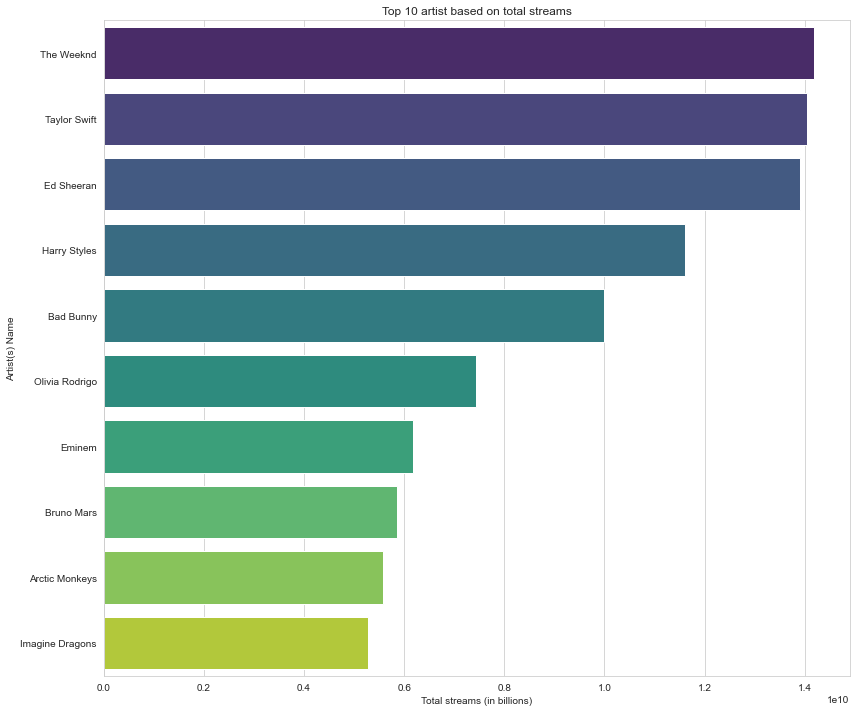

In [13]:
spotify_data['streams'] = pd.to_numeric(spotify_data['streams'], errors = 'coerce')

#Grouping by atrist again and summing up their streams

artist_streams = spotify_data.groupby('artist(s)_name')['streams'].sum().sort_values(ascending = False).head(10)

plt.figure(figsize = (12,10))
sns.barplot(x = artist_streams.values, y = artist_streams.index, palette='viridis', orient ='h')
plt.title('Top 10 artist based on total streams')
plt.xlabel('Total streams (in billions)')
plt.ylabel('Artist(s) Name')
plt.tight_layout()
plt.show()

## 5.Streams Vs precentage features

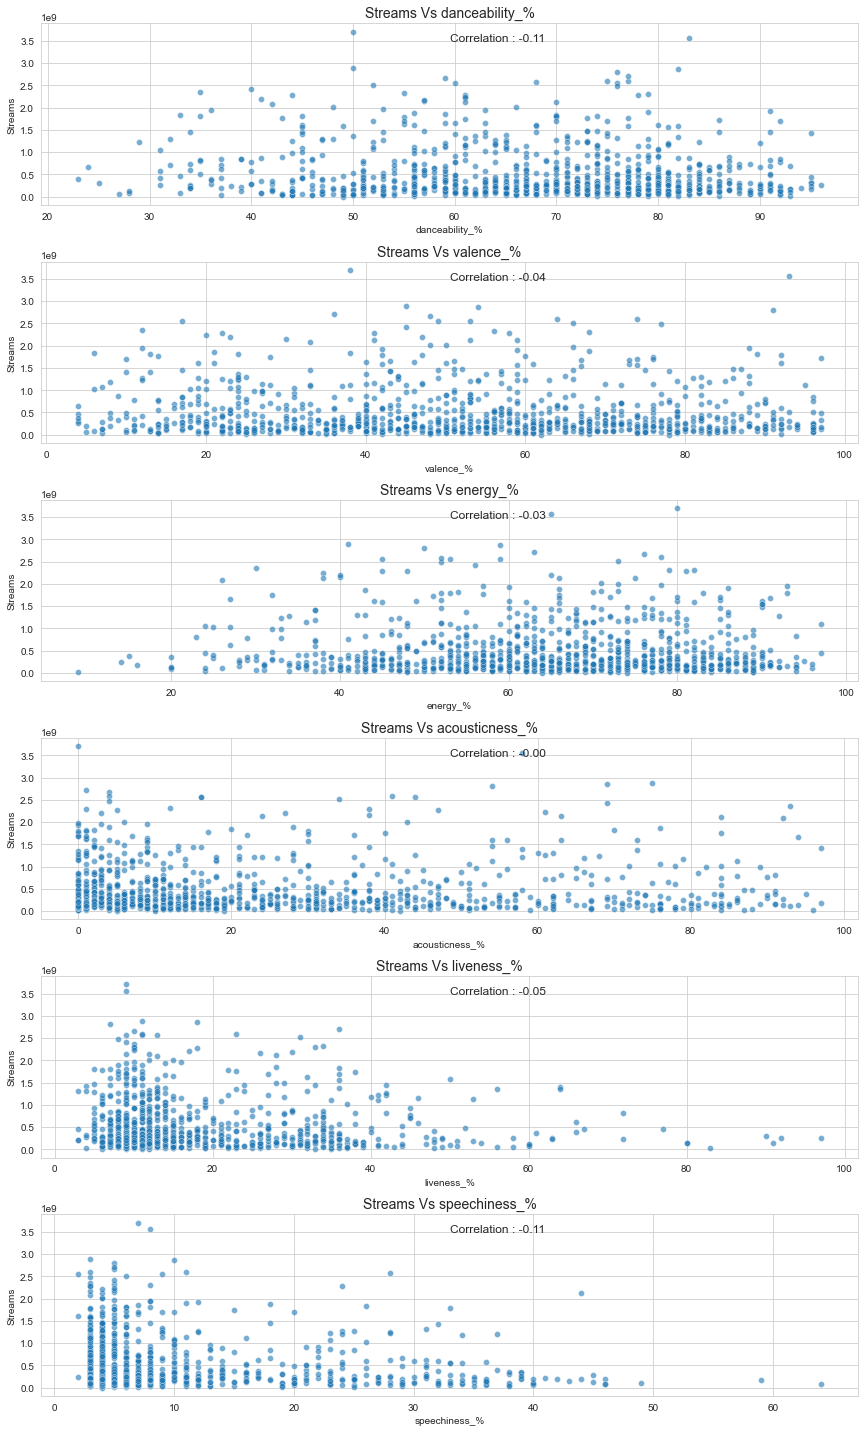

In [17]:
#list of features to compare with stream 
features = ['danceability_%', 'valence_%','energy_%','acousticness_%','liveness_%','speechiness_%']

fig, axes = plt.subplots(nrows = len(features), figsize =(12,20))

correlations = {}
for i, feature in enumerate(features):
    sns.scatterplot(x=spotify_data[feature], y=spotify_data['streams'], ax = axes[i], alpha = 0.6)
    axes[i].set_title(f'Streams Vs {feature}', fontsize=14)
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Streams')
    corr = spotify_data['streams'].corr(spotify_data[feature])
    correlations[feature]= corr
    axes[i].annotate(f'Correlation : {corr:.2f}', xy =(0.5, 0.9), xycoords='axes fraction', fontsize =12)
    
plt.tight_layout()
plt.show()

In [16]:
correlations

{'danceability_%': -0.1054568836914191,
 'valence_%': -0.04083136749515947,
 'energy_%': -0.026051488364248927,
 'acousticness_%': -0.004484652700684072,
 'liveness_%': -0.04833729577983246,
 'speechiness_%': -0.1123329964033855}

* Stream Vs Danceability : a slightly negative correlation (r = -0.105), suggests that tracks with higher danceability tend to have slightly fewer streams, although the relationship is weak.

* Stream Vs Valence : a very weak negative correlation (r = -0.041), implying that the mood of track (from sad to happy) has little influence on the number of streams

* Stream Vs Energy : an even weaker negative correlation (r = -0.026), suggesting that the energy of track has minimal impact on streaming

* Stream Vs Acousticness : almost no correlation (r = -0.004), indicating that acousticness of track does not significantly influence its streams

* Stream Vs Liveness : a weak negative correlation (r = -0.048), suggesting that tracks recorded live might have slightly few streams

* Streams Vs speechiness : a slightly negative correlation (r = -0.112), suggesting that tracks with  more spoken words or rap might have slightly fewer streams

## 6. Precentage feature vs top artist

In [18]:
#selecting top artist based on number of songs they have in dataset
top_artists = spotify_data['artist(s)_name'].value_counts().head(10)

#filtering data of only these top artists
top_artist_data = spotify_data[spotify_data['artist(s)_name'].isin(top_artists)]

fig, axes = plt.subplots(nrows = len(top_artist_data))

Taylor Swift      34
The Weeknd        22
Bad Bunny         19
SZA               19
Harry Styles      17
Kendrick Lamar    12
Morgan Wallen     11
Ed Sheeran         9
BTS                8
Feid               8
Name: artist(s)_name, dtype: int64